# Prediction Of Damages Caused By Floods & Earthqaukes Using ANN

### Abstract

Natural disasters are an increasing phenomenon clearly perceived and known to have a direct, life-altering impact on the welfare of the region it hits and its residents. Depending on where we live, hurricanes, earthquakes, floods, droughts, etc are a threat to lives, properties, productive assets & financial resources. The growing incidence of natural disasters is directly proportional to the increasing vulnerability of households and communities in affected regions. In this work, an artificial neural network has been used to predict the damages caused by natural disasters that can be felt at the community, city and state level as well as on an entire country. Artificial neural networks are mathematical models, inspired by a biological neural network process – the biological neuron. They are used for the modeling of various complex input and output relationships as well as to find and match patterns of any given data. This report results in the comparison of different machine learning algorithms currently used to increase the accuracy of predictions. Training various neural networks, damages occurred due to floods & earthquakes have been estimated using test data.

### Implementation

Natural disasters cause massive casualties, damages and leave many injured. Human beings cannot stop them but timely prediction and due safety measures can prevent loss of human lives and many precious objects can be saved. The main focus of this project is on the application of data-driven models in the context of real-time forecasting of the damages.

This section follows an implementation plan which includes Data Selection, Data Preprocessing and Visualization, Application of Artificial Neural Networks, and its performance evaluation.

#### Importing Packages

In [1]:
# External Packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time

# Visualzation Packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import squarify
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='psn1997', api_key='ffj08tmHIdZR3dUcbBIv')

# Encoding Packages
import category_encoders as ce  #Category Encoder
from sklearn.preprocessing import LabelEncoder  #Label Encoder

# Preprocessing Packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn import svm  #SVM Model
from sklearn.tree import DecisionTreeClassifier  #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifier

# Artificial Neural Network Models
from keras.utils import np_utils
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense  #FFNN
from keras.layers.recurrent import LSTM  #RNN
from keras.layers import Embedding
from keras.optimizers import RMSprop
from rbflayer import RBFLayer, InitCentersRandom  #RBFN 

# Evaluation Packages
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

Using TensorFlow backend.


#### Confusion Matrix Function 

A confusion matrix of size n x n associated with a classifier shows the predicted and actual classification, where n is the number of different classes. The prediction accuracy and classification error can be obtained from this matrix.
This function prints and plots the confusion matrix.

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#### Evaluation Function

**Precision:** What proportion of positive identifications was actually correct.<br> 
**Recall:** What proportion of actual positives was identified correctly.<br>
**F1 Score:** is needed when you want to seek a balance between Precision and Recall.<br>
**Cohen Kappa Score:** Kappa Score is a metric that compares an Observed Accuracy with an Expected Accuracy.<br>


In [3]:
def evaluate_model(y_true, pred):
    class_names = np.array(['0','1','2','3','4'])
    plot_confusion_matrix(y_test, pred,classes= class_names , title='Confusion matrix, without normalization')
    plt.show()
    print("Cohen Kappa Score: "+ str(cohen_kappa_score(y_test, pred)))
    print("Classification report \n" + str(classification_report(y_test, pred, target_names=class_names)))
    
    return

#### Read Data

Records of floods are obtained from the Storm Events Database (SED), maintained by National Oceanic and Atmospheric Administration's National Weather Service (NWS).

The dataset taken into consideration is from the year 2006 till 2018 and contains 16449 rows.

In [4]:
floods = pd.read_csv("database.csv", index_col=0)
np.random.seed(0)

#### Visulization of Data

In [5]:
viz_floods = floods.copy()
freq_floods = viz_floods['State'].value_counts()
freq_floods = freq_floods.to_frame().reset_index()
freq_floods = freq_floods.rename(columns= {"index": "State", "State":"Frequency"})

Squarify Plot <br>
Flood Prone States of USA

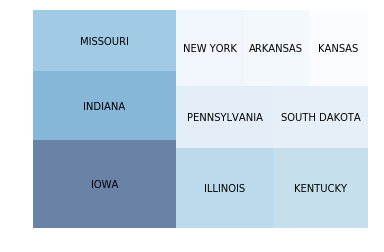

In [6]:
cmap = matplotlib.cm.Blues
mini=freq_floods['Frequency'][0:10].min()
maxi=freq_floods['Frequency'][0:10].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in freq_floods['Frequency'][0:10]]

squarify.plot(sizes=freq_floods['Frequency'][0:10], label=freq_floods['State'][0:10], alpha=.6, color=colors)
plt.axis('off')
plt.show()

Plotly <br>
USA Map for Flood Prone States

In [7]:
floods_gb=floods.groupby(['State', 'Code']).size()
floods_gb = floods_gb.to_frame().reset_index()
floods_gb = floods_gb.rename(columns= {0: "Frequency"})

In [8]:
for col in floods_gb.columns:
    floods_gb[col] = floods_gb[col].astype(str)

scl = [
    [0.0, '#E8EAF6'],
    [0.1, '#C5CAE9'],
    [0.2, '#9FA8DA'],
    [0.3, '#7986CB'],
    [0.4, '#5C6BC0'],
    [0.5, '#3F51B5'],
    [0.6, '#3949AB'],
    [0.7, '#303F9F'],
    [0.8, '#283593'],
    [0.9, '#1A237E'],
    [1.0, '#0c1359']
]


floods_gb['text'] = floods_gb['State']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = floods_gb['Code'],
    z = floods_gb['Frequency'].astype(float),
    locationmode = 'USA-states',
    text = floods_gb['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Frequency")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = ''
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

PlotlyRequestError: No message

#### Preprocessing of Data
**Discarding Null Values:** Preprocessing on floods dataset involved discarding rows having null values, as these null values are either not supported by many machine learning models or these values caused the output to give a skewed accuracy. <br>
**Binary Encoding:** This technique is not as intuitive as the one-hot encoder. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot. Category encoders are used to invoke binary encoding functions.

In [9]:
final_floods_drop = floods.copy()
final_floods_drop = final_floods_drop.dropna(subset=["Damage_Property"])
final_floods_drop = final_floods_drop.dropna(subset=["Range_Damage_Property"])
final_floods_drop = final_floods_drop.dropna(subset=["Flood_Cause"])
final_floods_drop = final_floods_drop.dropna(subset=["Begin_Lat"])
final_floods_drop = final_floods_drop.dropna(subset=["Begin_Lon"])
final_floods_drop = final_floods_drop.dropna(subset=["End_Lat"])
final_floods_drop = final_floods_drop.dropna(subset=["End_Lon"])
print(final_floods_drop.isnull().sum())

Begin_Month              0
Begin_Day                0
Begin_Year               0
Begin_Time               0
End_Date_Time            0
End_Month                0
End_Day                  0
End_Time                 0
Code                     0
State                    0
CZ_Type                  0
CZ_Name                  0
Damage_Property          0
Range_Damage_Property    0
Flood_Cause              0
Begin_Lat                0
Begin_Lon                0
End_Lat                  0
End_Lon                  0
dtype: int64


In [10]:
final_floods_ce = final_floods_drop.copy()
encoder = ce.BinaryEncoder(cols=['Flood_Cause'])
final_floods= encoder.fit_transform(final_floods_ce)

#### Application of Models

This project elaborates six models, which forms the core of our comprehensive comparative study to predict the possible damages caused due to natural disasters.

**Machine Learning Models**

In [11]:
X = final_floods[['Flood_Cause_0', 'Flood_Cause_1', 'Flood_Cause_2', 'Flood_Cause_3','Begin_Lat', 'Begin_Lon', 'End_Lat', 'End_Lon']].copy()
y = final_floods[['Range_Damage_Property']].copy()

In [12]:
# Split Data into Train & Test Data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train['Range_Damage_Property'].value_counts())
print(y_test['Range_Damage_Property'].value_counts())

(11535, 8)
(2884, 8)
(11535, 1)
(2884, 1)
0.0    6805
2.0    1719
3.0    1506
1.0    1388
4.0     117
Name: Range_Damage_Property, dtype: int64
0.0    1711
2.0     407
3.0     376
1.0     361
4.0      29
Name: Range_Damage_Property, dtype: int64


**Support Vector Machine (SVM) Model**

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.5932732316227461
Confusion matrix, without normalization


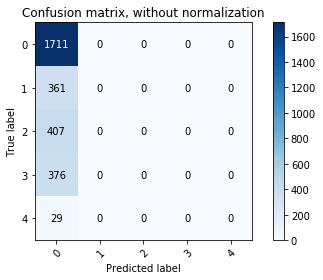

Cohen Kappa Score: 0.0
Classification report 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1711
           1       0.00      0.00      0.00       361
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       376
           4       0.00      0.00      0.00        29

   micro avg       0.59      0.59      0.59      2884
   macro avg       0.12      0.20      0.15      2884
weighted avg       0.35      0.59      0.44      2884



C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [15]:
# Create a SVM Model
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Print Model Accuracy
print(clf.predict(X_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate Model
evaluate_model(y_test, clf.predict(X_test))

**Decision Tree Classifier**

Accuracy: 0.6636615811373093
Confusion matrix, without normalization


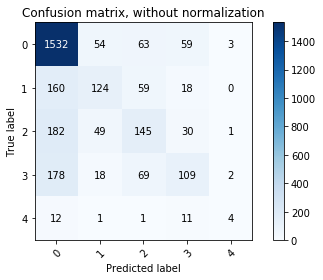

Cohen Kappa Score: 0.37477329083921773
Classification report 
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1711
           1       0.50      0.34      0.41       361
           2       0.43      0.36      0.39       407
           3       0.48      0.29      0.36       376
           4       0.40      0.14      0.21        29

   micro avg       0.66      0.66      0.66      2884
   macro avg       0.51      0.40      0.44      2884
weighted avg       0.63      0.66      0.64      2884



In [15]:
# Create Decision Tree classifer
clf = DecisionTreeClassifier(criterion="entropy", splitter="best",max_depth=11)

# Train the model using the training sets
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Print Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate Model
evaluate_model(y_test, y_pred)

**Random Forest Classifier**

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy: 0.6771844660194175
Confusion matrix, without normalization


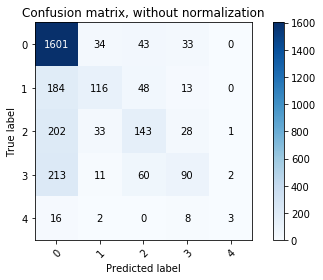

Cohen Kappa Score: 0.37128473149097785
Classification report 
              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1711
           1       0.59      0.32      0.42       361
           2       0.49      0.35      0.41       407
           3       0.52      0.24      0.33       376
           4       0.50      0.10      0.17        29

   micro avg       0.68      0.68      0.68      2884
   macro avg       0.56      0.39      0.43      2884
weighted avg       0.64      0.68      0.64      2884



In [16]:
# Create Random Forest classifer
clf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,min_samples_split=5,verbose=1)

# Train the model using the training sets
clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred=clf.predict(X_test)

# Print Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate Model
evaluate_model(y_test, y_pred)

**Artificial Neural Network**

In [13]:
#Covert classes to categorical type

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

encoded_y_train = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)

encoded_y_test = np_utils.to_categorical(encoded_Y)

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

**Feed Forward Neural Network**

In [14]:
# Create Feed Forward Neural Network
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the Network
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model using the training sets
model.fit(X_train, encoded_y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, encoded_y_test))

# Print Model Accuracy
[test_loss, test_acc] = model.evaluate(X_test, encoded_y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 11535 samples, validate on 2884 samples
Epoch 1/20
11535/11535 [==============================] - 5s 472us/step - loss: 6.6134 - acc: 0.5896 - val_loss: 6.5557 - val_acc: 0.5933
Epoch 2/20
11535/11535 [==============================] - 3s 270us/step - loss: 6.6093 - acc: 0.5899 - val_loss: 6.5557 - val_acc: 0.5933
Epoch 3/20
11535/11535 [==============================] - 3s 263us/step - loss: 6.6093 - acc: 0.5899 - val_loss: 6.5557 - val_acc: 0.5933
Epoch 4/20
11535/11535 [==============================] - 3s 267us/step - loss: 6.6093 - acc: 0.5899 - val_loss: 6.5557 - val_acc: 0.5933
Epoch 5/20
11535/11535 [==============================] - 3s 275us/step - loss: 6.6093 - acc: 0.5899 - val_loss: 6.5557 - val_acc: 0.5933
Epoch 6/20
11535/11535 [==============================] - 3s 268us/step - loss: 6.6093 - acc: 0.5899 - val_loss: 6.5557 - val_acc: 0.5933
Epoch 7/20
11535/11535 [==============================] - 3s 263us/step - loss: 6.6093 - acc: 0.5899 - val_loss: 6.5557 - v

[0 0 0 ... 0 0 0]
Confusion matrix, without normalization


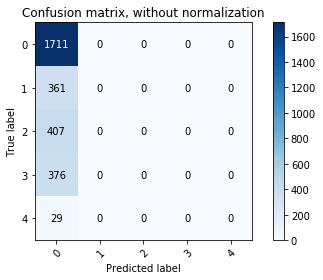

Cohen Kappa Score: 0.0
Classification report 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1711
           1       0.00      0.00      0.00       361
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       376
           4       0.00      0.00      0.00        29

   micro avg       0.59      0.59      0.59      2884
   macro avg       0.12      0.20      0.15      2884
weighted avg       0.35      0.59      0.44      2884

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Tot

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [15]:
pred = model.predict_classes(X_test)
print(pred)

# Evaluate Model
evaluate_model(y_test, pred)

# Print Model Summary
print(model.summary())

**Recurrent Neural Network**

In [14]:
# Create Recurrent Neural Network
embed_dim = 128
lstm_out = 200
batch_size = 32

model = Sequential()
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(5,activation='softmax'))

# Compile the Network
model.compile(loss = 'categorical_crossentropy', optimizer='SGD',metrics = ['accuracy'])

# Train the model using the training sets
model.fit(X_train, encoded_y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, encoded_y_test))

# Print Model Accuracy
[test_loss, test_acc] = model.evaluate(X_test,encoded_y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
pred = model.predict_classes(X_test)
print(pred)

# Evaluate Model
evaluate_model(y_test, pred)

# Print Model Summary
print(model.summary())

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`



Train on 11535 samples, validate on 2884 samples
Epoch 1/20


KeyboardInterrupt: 

**Radial Basis Function Network**

In [15]:
# Create Radial Basis Function Network
if __name__ == "__main__":

    X=X_train.values
    y=encoded_y_train

    model = Sequential()
    rbflayer = RBFLayer(16,
                        initializer=InitCentersRandom(X), 
                        betas=1.0,
                        input_shape=(8,))
    model.add(rbflayer)
    model.add(Dense(16, activation='relu', input_dim=8))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))

# Compile the Network
    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(), metrics=['accuracy'])
    
# Train the model using the training sets
    model.fit(X, y,
              batch_size=10,
              epochs=20,
              verbose=1)

    y_pred = model.predict(X)

Epoch 1/20
11535/11535 [==============================] - 6s 485us/step - loss: 0.1218 - acc: 0.5883
Epoch 2/20
11535/11535 [==============================] - 5s 390us/step - loss: 0.1156 - acc: 0.5904
Epoch 3/20
11535/11535 [==============================] - 4s 385us/step - loss: 0.1138 - acc: 0.5906
Epoch 4/20
11535/11535 [==============================] - 5s 397us/step - loss: 0.1129 - acc: 0.5915
Epoch 5/20
11535/11535 [==============================] - 4s 384us/step - loss: 0.1121 - acc: 0.5938
Epoch 6/20
11535/11535 [==============================] - 4s 386us/step - loss: 0.1113 - acc: 0.5957
Epoch 7/20
11535/11535 [==============================] - 4s 384us/step - loss: 0.1101 - acc: 0.5992
Epoch 8/20
11535/11535 [==============================] - 4s 388us/step - loss: 0.1090 - acc: 0.6083
Epoch 9/20
11535/11535 [==============================] - 4s 379us/step - loss: 0.1084 - acc: 0.6134
Epoch 10/20
11535/11535 [==============================] - 5s 399us/step - loss: 0.1079 - a

2884/2884 [==============================] - 0s 82us/step
Evaluation result on Test Data : Loss = 0.10732201725533864, accuracy = 0.6192787794729542
[0 2 0 ... 0 0 0]
0.0: 2497
1.0: 71
2.0: 206
3.0: 110
4.0: 0
Confusion matrix, without normalization


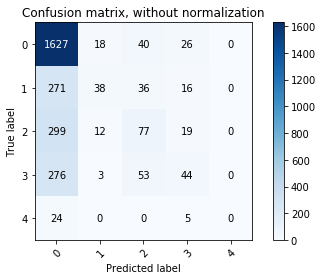

Cohen Kappa Score: 0.18684544621617072
Classification report 
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1711
           1       0.54      0.11      0.18       361
           2       0.37      0.19      0.25       407
           3       0.40      0.12      0.18       376
           4       0.00      0.00      0.00        29

   micro avg       0.62      0.62      0.62      2884
   macro avg       0.39      0.27      0.28      2884
weighted avg       0.56      0.62      0.54      2884

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rbf_layer_1 (RBFLayer)       (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)              

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Danesh Parwani\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [16]:
# Print Model Accuracy
test_X=X_test.values
test_Y=encoded_y_test
[test_loss, test_acc] = model.evaluate(test_X,test_Y)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

pred = model.predict_classes(X_test)
print(pred)
print("0.0: " + str(np.count_nonzero(pred == 0)))
print("1.0: " + str(np.count_nonzero(pred == 1)))
print("2.0: " + str(np.count_nonzero(pred == 2)))
print("3.0: " + str(np.count_nonzero(pred == 3)))
print("4.0: " + str(np.count_nonzero(pred == 4)))

# Evaluate Model
evaluate_model(y_test, pred)

# Print Model Summary
print(model.summary())

In [17]:
#Save model as Json

modelRbf = model.to_json()
with open("modelRbf.json", "w") as json_file:
    json_file.write(modelRbf)
    
model.save_weights("modelRbf.h5")
print("Saved Model to Disk")

Saved Model to Disk


### Test with your own inputs

In [ ]:
"""from rbflayer import RBFLayer, InitCentersRandom  #RBFN 

json_file = open('modelRbf.json',  'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("modelRbf.h5")
print("Loaded model from Disk")"""

'from rbflayer import RBFLayer, InitCentersRandom  #RBFN \n\njson_file = open(\'modelRbf.json\',  \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\n\nloaded_model = model_from_json(loaded_model_json)\nloaded_model.load_weights("modelRbf.h5")\nprint("Loaded model from Disk")'

In [ ]:
print(X_test.head(5))

                  Flood_Cause_0  Flood_Cause_1  Flood_Cause_2  Flood_Cause_3  \
Begin_Date_Time                                                                
5/2/2010 12:15                0              0              0              1   
9/28/2010 22:44               0              0              0              1   
5/1/2011 0:00                 0              0              0              1   
6/8/2008 7:30                 0              0              0              1   
12/27/2008 11:46              0              0              0              1   

                  Begin_Lat  Begin_Lon  End_Lat  End_Lon  
Begin_Date_Time                                           
5/2/2010 12:15        39.52     -82.05    39.64   -82.02  
9/28/2010 22:44       42.72     -94.25    42.73   -94.21  
5/1/2011 0:00         37.63     -89.58    37.82   -89.76  
6/8/2008 7:30         43.34     -90.85    43.30   -90.86  
12/27/2008 11:46      38.57     -93.97    38.55   -93.96  


F0 = input("Enter F0: ")
F1 = input("Enter F1: ")
F2 = input("Enter F2: ")
F3 = input("Enter F3: ")

Blat = input("Enter Begin Latitude: ")
Blong = input("Enter Begin Longitude: ")
Elat = input("Enter End Latitude: ")
Elong = input("Enter End Longitude: ")

test = pd.DataFrame(columns=["Flood_Cause_0", "Flood_Cause_1", "Flood_Cause_2", "Flood_Cause_3", "Begin_Lat", "Begin_Lon", "End_Lat","End_Lon"])

test = test.append({"Flood_Cause_0": F0, "Flood_Cause_1":F1 , "Flood_Cause_2":F2 , "Flood_Cause_3":F3 , "Begin_Lat": Blat, "Begin_Lon": Blong, "End_Lat": Elat,"End_Lon":Elong } , ignore_index=True)

In [26]:
pred = model.predict_classes(test)

print("Predicted Damage is: " +str(pred))

Predicted Damage is: [0]
